In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'noodles.csv')

In [3]:
df.head()

,Country/Region,2018,2019,2020,2021,2022,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population
0,China,40250.0,41450.0,46360.0,43990,45070.0,1,CHN,China,Beijing,Asia,1425887337
1,Indonesia,12540.0,12520.0,12640.0,13270,14260.0,4,IDN,Indonesia,Jakarta,Asia,275501339
2,India,6060.0,6730.0,6730.0,7560,7580.0,2,IND,India,New Delhi,Asia,1417173173
3,Japan,5780.0,5630.0,5970.0,5850,5980.0,11,JPN,Japan,Tokyo,Asia,123951692
4,Philippines,3980.0,3850.0,4470.0,4440,4290.0,13,PHL,Philippines,Manila,Asia,115559009


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Region     53 non-null     object 
 1   2018               52 non-null     float64
 2   2019               52 non-null     float64
 3   2020               52 non-null     float64
 4   2021               53 non-null     int64  
 5   2022               52 non-null     float64
 6   Rank               53 non-null     int64  
 7   CCA3               53 non-null     object 
 8   Country/Territory  53 non-null     object 
 9   Capital            53 non-null     object 
 10  Continent          53 non-null     object 
 11  2022 Population    53 non-null     int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 5.1+ KB


In [5]:
df.isnull().sum()

Country/Region       0
2018                 1
2019                 1
2020                 1
2021                 0
2022                 1
Rank                 0
CCA3                 0
Country/Territory    0
Capital              0
Continent            0
2022 Population      0
dtype: int64

In [6]:
df.describe()

,2018,2019,2020,2021,2022,Rank,2022 Population
count,52.000000,52.000000,52.000000,53.000000,52.000000,53.000000,5.300000e+01
mean,1782.692308,1833.461538,1989.423077,1952.075472,2046.730769,45.698113,1.143409e+08
std,5849.555410,6009.552815,6659.770771,6321.729120,6554.724900,36.322056,2.691011e+08
min,10.000000,10.000000,0.000000,10.000000,10.000000,1.000000,5.180829e+06
25%,50.000000,57.500000,67.500000,60.000000,67.500000,17.000000,1.784391e+07
50%,190.000000,230.000000,240.000000,270.000000,260.000000,37.000000,3.985714e+07
75%,902.500000,915.000000,942.500000,900.000000,1037.500000,68.000000,8.855057e+07
max,40250.000000,41450.000000,46360.000000,43990.000000,45070.000000,124.000000,1.425887e+09


In [7]:
df.fillna(0, inplace =True)

In [8]:
df.describe()

,2018,2019,2020,2021,2022,Rank,2022 Population
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,5.300000e+01
mean,1749.056604,1798.867925,1951.886792,1952.075472,2008.113208,45.698113,1.143409e+08
std,5798.209692,5956.814346,6601.082387,6321.729120,6497.477930,36.322056,2.691011e+08
min,0.000000,0.000000,0.000000,10.000000,0.000000,1.000000,5.180829e+06
25%,50.000000,50.000000,60.000000,60.000000,60.000000,17.000000,1.784391e+07
50%,190.000000,210.000000,220.000000,270.000000,240.000000,37.000000,3.985714e+07
75%,830.000000,830.000000,870.000000,900.000000,880.000000,68.000000,8.855057e+07
max,40250.000000,41450.000000,46360.000000,43990.000000,45070.000000,124.000000,1.425887e+09


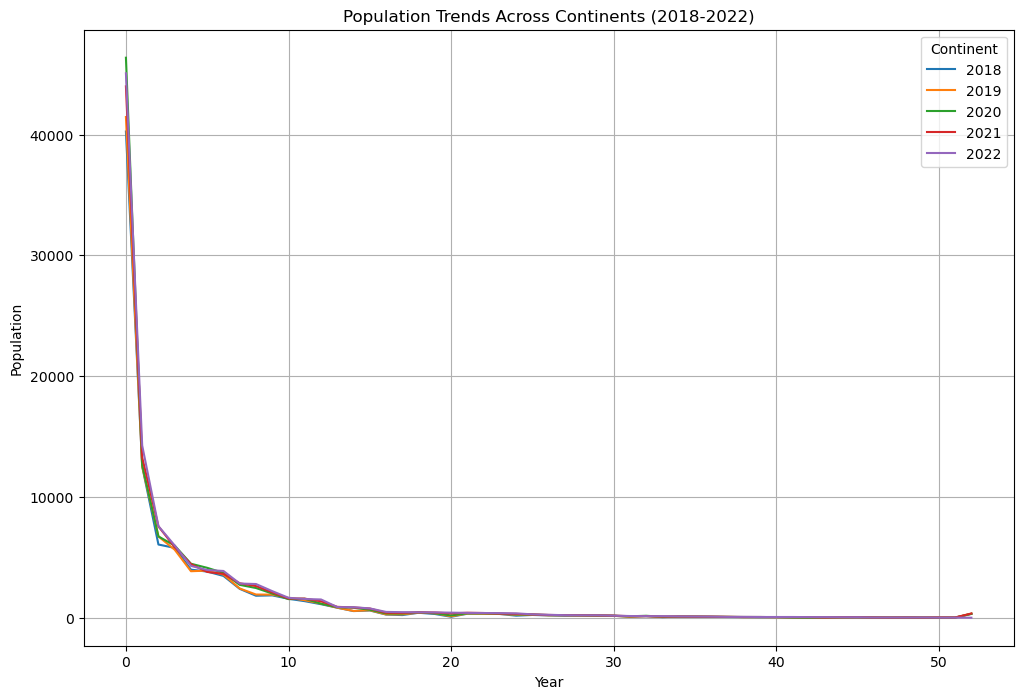

In [9]:
# Set the size of the figure
plt.figure(figsize=(12, 8))

# Create a line plot for each continent
sns.lineplot(data=df.drop(columns=['Rank', '2022 Population']), dashes=False)

# Add title and labels
plt.title('Population Trends Across Continents (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Continent')
plt.grid(True)

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

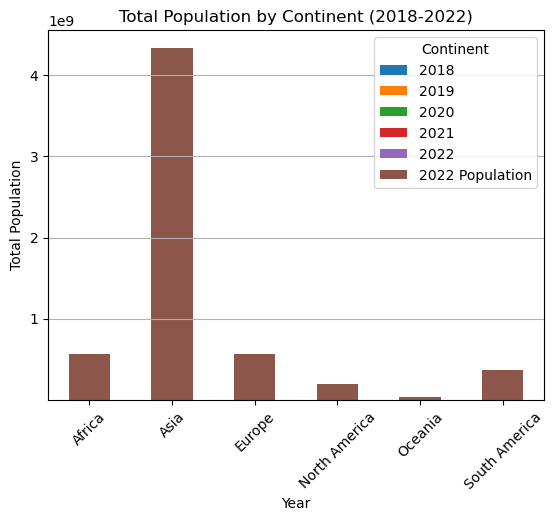

In [10]:
# Set the size of the figure
plt.figure(figsize=(12, 8))

# Group by continent and sum the population for each year
population_by_continent = df.groupby('Continent').sum().drop(columns=['Rank'])

# Create bar plot
population_by_continent.plot(kind='bar', stacked=True)

# Add title and labels
plt.title('Total Population by Continent (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend(title='Continent')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

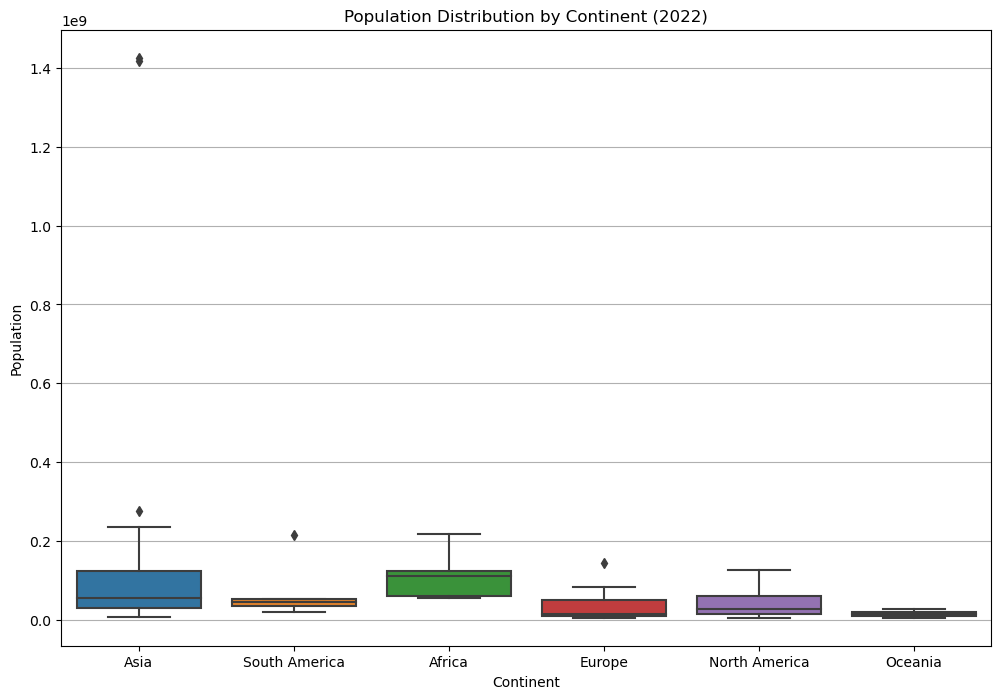

In [11]:
# Set the size of the figure
plt.figure(figsize=(12, 8))

# Create box plot
sns.boxplot(x='Continent', y='2022 Population', data=df)

# Add title and labels
plt.title('Population Distribution by Continent (2022)')
plt.xlabel('Continent')
plt.ylabel('Population')
plt.grid(axis='y')

# Show the plot
plt.show()

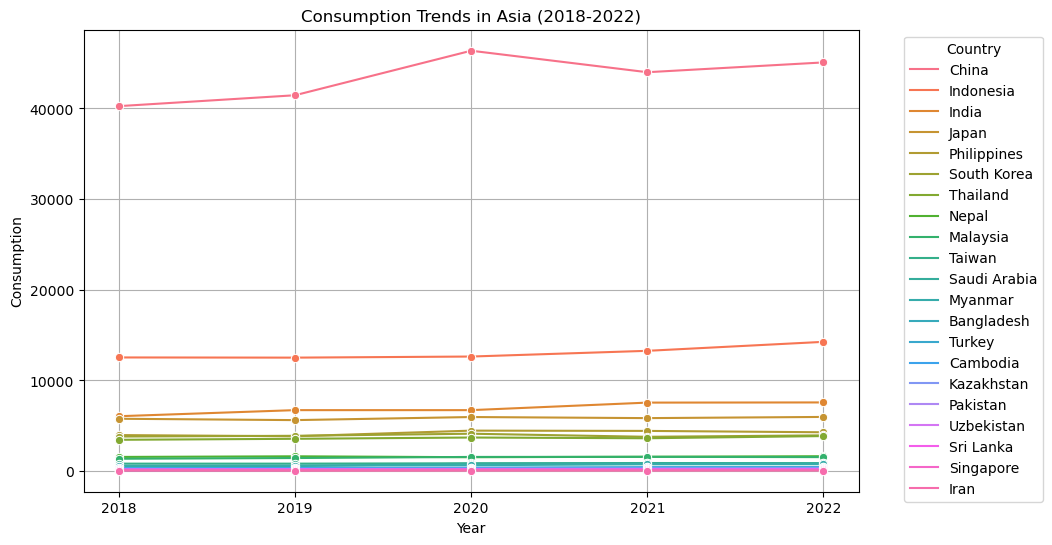

In [12]:
plt.figure(figsize=(10, 6))

# Filter data for Asia
asia_data = df[df['Continent'] == 'Asia'].drop(columns=['Rank', 'CCA3', 'Capital', 'Country/Territory', 'Continent', '2022 Population'])

# Melt the dataframe to long format
melted_data = asia_data.melt(id_vars=['Country/Region'], var_name='Year', value_name='Consumption')

# Plot lineplot for Asia
sns.lineplot(data=melted_data, x='Year', y='Consumption', hue='Country/Region', marker='o')

plt.title('Consumption Trends in Asia (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

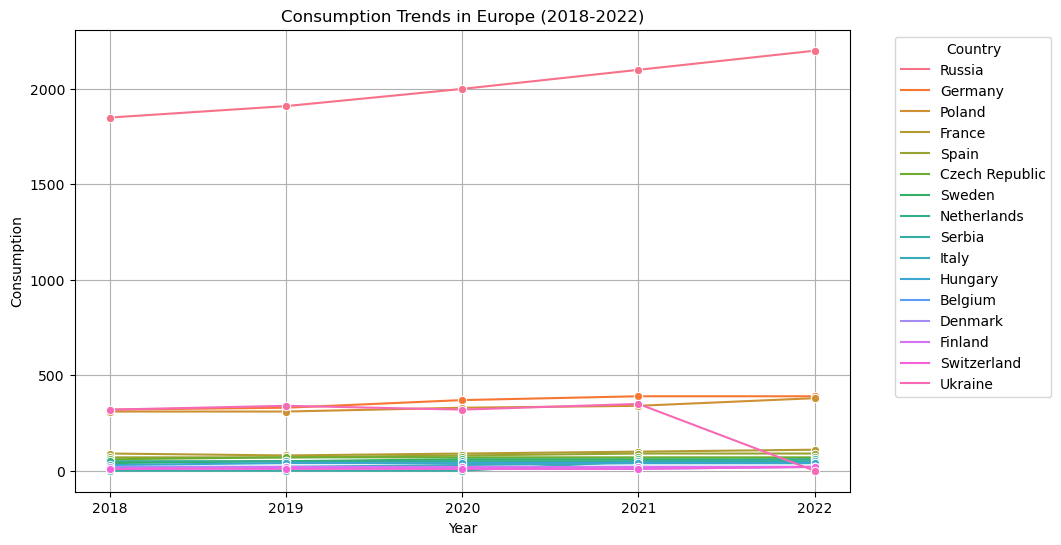

In [13]:
plt.figure(figsize=(10, 6))

# Filter data for Europe
europe_data = df[df['Continent'] == 'Europe'].drop(columns=['Rank', 'CCA3', 'Capital', 'Country/Territory', 'Continent', '2022 Population'])

# Melt the dataframe to long format
melted_data = europe_data.melt(id_vars=['Country/Region'], var_name='Year', value_name='Consumption')

# Plot lineplot for Europe
sns.lineplot(data=melted_data, x='Year', y='Consumption', hue='Country/Region', marker='o')

plt.title('Consumption Trends in Europe (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()


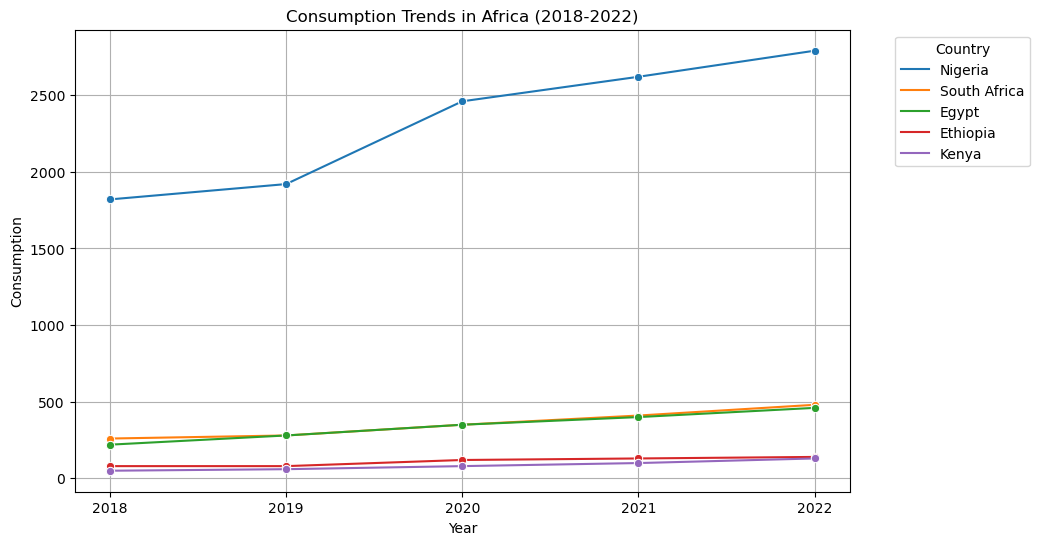

In [14]:
plt.figure(figsize=(10, 6))

# Filter data for Africa
africa_data = df[df['Continent'] == 'Africa'].drop(columns=['Rank', 'CCA3', 'Capital', 'Country/Territory', 'Continent', '2022 Population'])

# Melt the dataframe to long format
melted_data = africa_data.melt(id_vars=['Country/Region'], var_name='Year', value_name='Consumption')

# Plot lineplot for Africa
sns.lineplot(data=melted_data, x='Year', y='Consumption', hue='Country/Region', marker='o')

plt.title('Consumption Trends in Africa (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

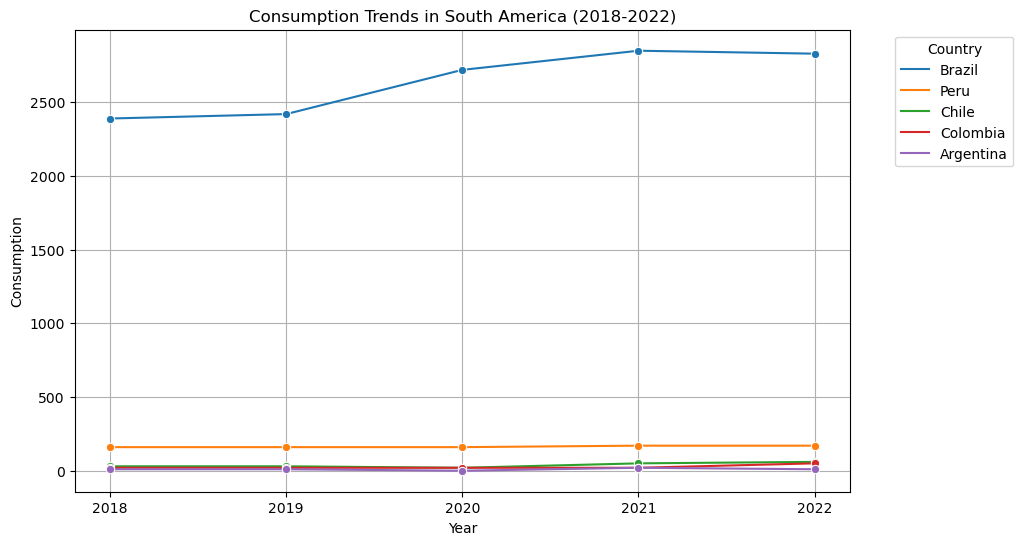

In [15]:
plt.figure(figsize=(10, 6))

# Filter data for South America
sa_data = df[df['Continent'] == 'South America'].drop(columns=['Rank', 'CCA3', 'Capital', 'Country/Territory', 'Continent', '2022 Population'])

# Melt the dataframe to long format
melted_data = sa_data.melt(id_vars=['Country/Region'], var_name='Year', value_name='Consumption')

# Plot lineplot for South America
sns.lineplot(data=melted_data, x='Year', y='Consumption', hue='Country/Region', marker='o')

plt.title('Consumption Trends in South America (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

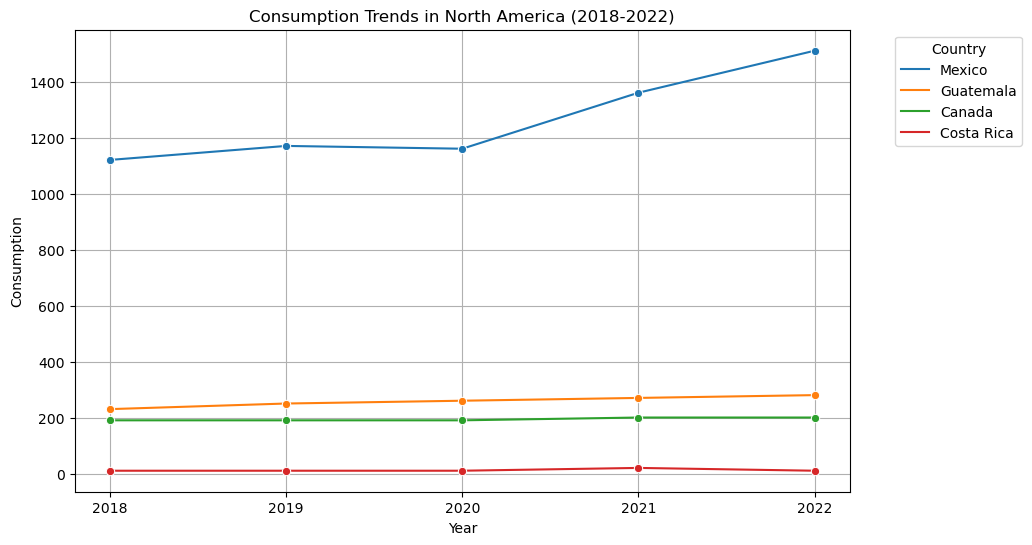

In [17]:
plt.figure(figsize=(10, 6))

# Filter data for North America
na_data = df[df['Continent'] == 'North America'].drop(columns=['Rank', 'CCA3', 'Capital', 'Country/Territory', 'Continent', '2022 Population'])

# Melt the dataframe to long format
melted_data = na_data.melt(id_vars=['Country/Region'], var_name='Year', value_name='Consumption')

# Plot lineplot for North America
sns.lineplot(data=melted_data, x='Year', y='Consumption', hue='Country/Region', marker='o')

plt.title('Consumption Trends in North America (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

<Figure size 1200x800 with 0 Axes>

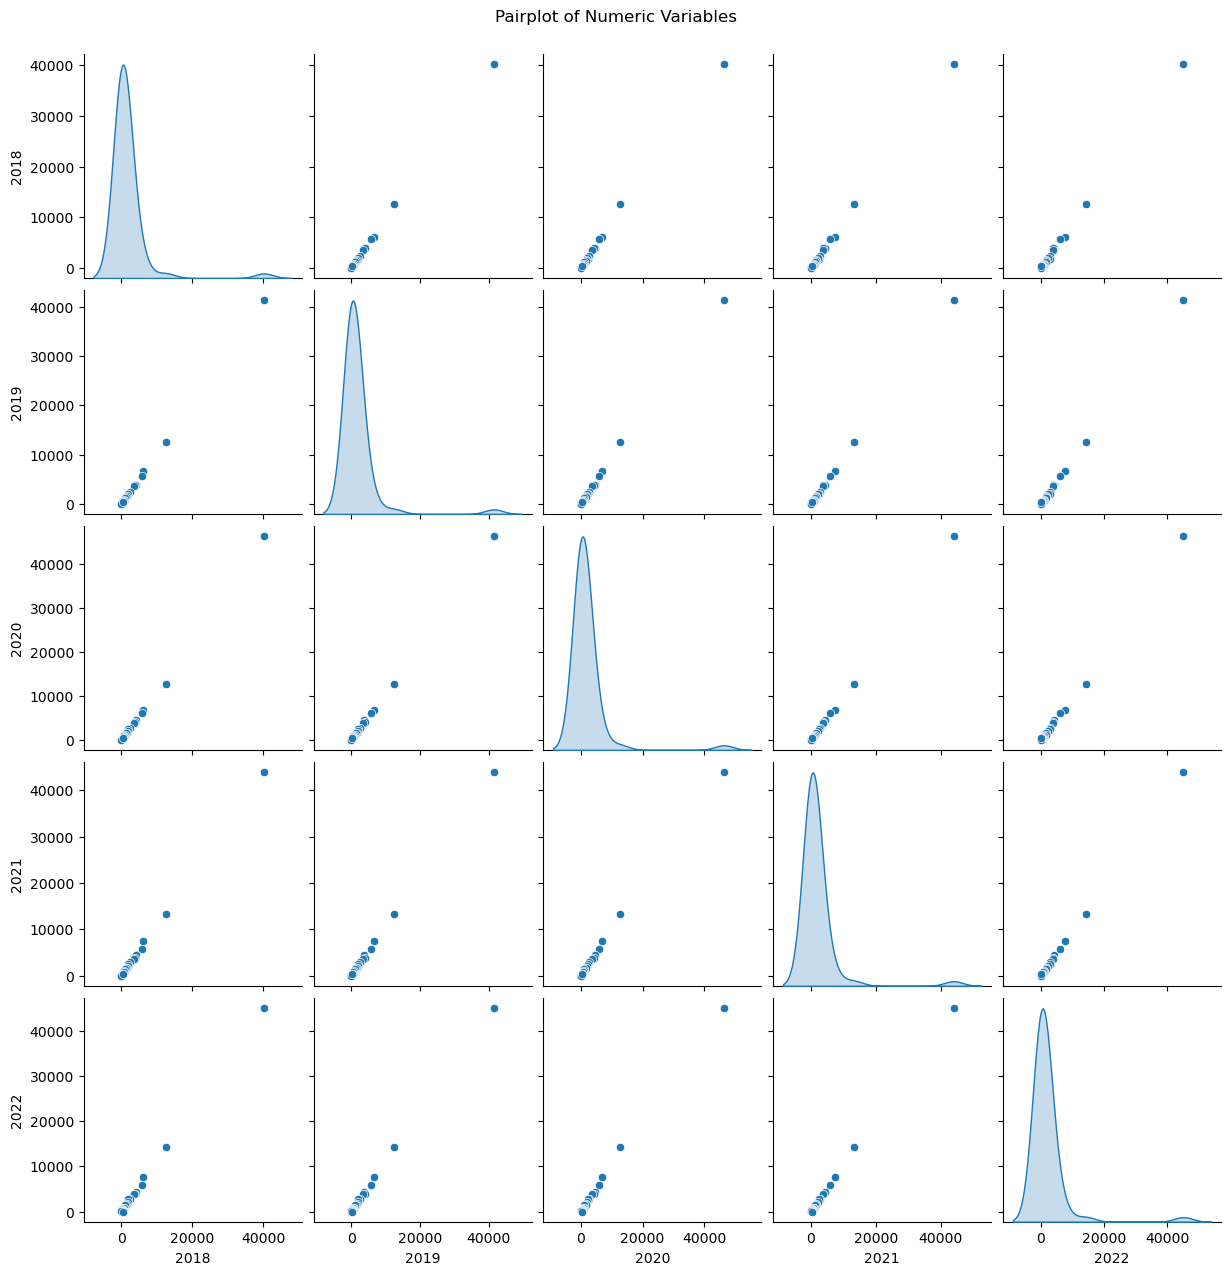

In [18]:
# Drop non-numeric columns for pairplot
numeric_df = df.drop(columns=['Rank', '2022 Population'])

# Create pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(numeric_df, diag_kind='kde')
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

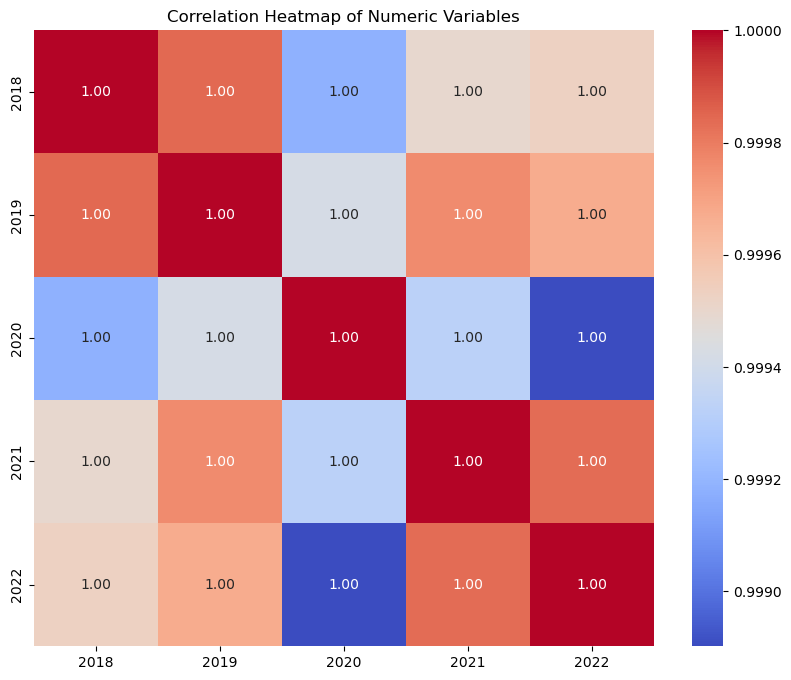

In [20]:
# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()